In [1]:
import torch

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
from warmup_scheduler import GradualWarmupScheduler
from models import PretrainModel
from dataset import ExternalDataset, chexpert_classes, chest14_classes
from utils import seed_everything

In [3]:
images_dir = '../../dataset/external_dataset/chest14/images'
batch_size = 4
image_size = 512

train_df = pd.read_csv('../../dataset/external_dataset/ext_csv/chest14_train.csv')
valid_df = pd.read_csv('../../dataset/external_dataset/ext_csv/chest14_valid.csv')
            

In [7]:
train_df

,image_path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95301,00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
95302,00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
95303,00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
95304,00030804_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [6]:
dst_classes=chest14_classes

In [7]:
dst_classes

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [2]:
train_dataset = ExternalDataset(df=train_df,images_dir=images_dir,image_size=image_size, mode='train',classes=dst_classes)
valid_dataset = ExternalDataset(df=valid_df,images_dir=images_dir,image_size=image_size, mode='valid',classes=dst_classes)

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=RandomSampler(train_dataset), num_workers=15)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, sampler=SequentialSampler(valid_dataset), num_workers=15)


NameError: name 'ExternalDataset' is not defined

In [24]:
images,labels=next(iter(train_loader))

images=images.detach().cpu().numpy()
labels=labels.detach().cpu().numpy()

images.shape

(4, 3, 512, 512)

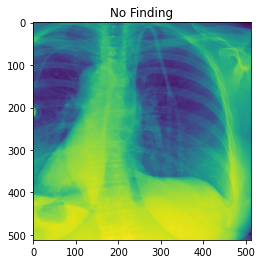

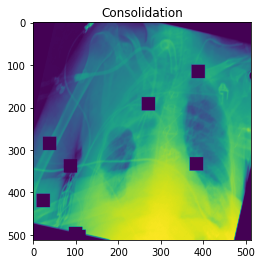

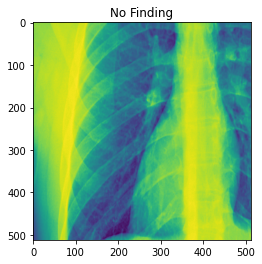

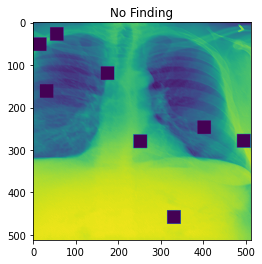

In [25]:
for img,label in zip(images, labels):
    plt.figure()
    plt.imshow(img[0])
    ones=np.where(label==1)[0]
    if len(ones)!=0:
        plt.title(dst_classes[ones[0]])
    else:
        plt.title('normal')

In [ ]:
RSN Apnoeu

In [8]:
from models import SiimCovidAuxModel
from dataset import RSNAPneuAuxDataset, rsnapneumonia_classes, chest14_classes

In [9]:
import yaml

cfg='configs/eb3_384_deeplabv3plus.yaml'
with open(cfg,'rt') as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

In [15]:
train_df = pd.read_csv('../../dataset/external_dataset/ext_csv/rsnapneumonia_train.csv')
valid_df = pd.read_csv('../../dataset/external_dataset/ext_csv/rsnapneumonia_valid.csv')

train_dataset = RSNAPneuAuxDataset(
    df=train_df,
    images_dir='.',
    image_size=cfg['aux_image_size'], mode='train')
valid_dataset = RSNAPneuAuxDataset(
    df=valid_df,
    images_dir='.',
    image_size=cfg['aux_image_size'], mode='valid')

train_loader = DataLoader(train_dataset, batch_size=8, sampler=RandomSampler(train_dataset), num_workers=cfg['workers'], drop_last=True)
valid_loader = DataLoader(valid_dataset, batch_size=8, sampler=SequentialSampler(valid_dataset), num_workers=cfg['workers'])


In [10]:
batch=next(iter(train_loader))

In [11]:
len(batch)

3

In [12]:
batch[0].shape,batch[1].shape,batch[2].shape

(torch.Size([36, 3, 384, 384]),
 torch.Size([36, 1, 384, 384]),
 torch.Size([36, 2]))

In [36]:
rsnapneumonia_classes

['normal', 'pneumonia']

In [37]:
images,masks,labels = batch

images=images.detach().cpu().numpy()
masks=masks.detach().cpu().numpy()
labels=labels.detach().cpu().numpy()

/home/sergey/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


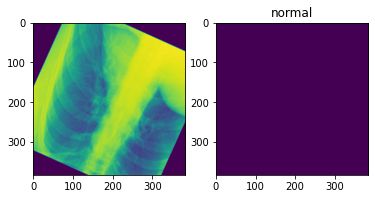

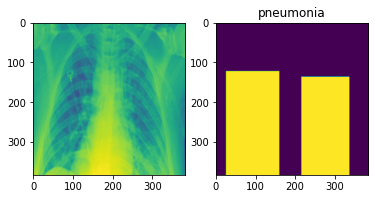

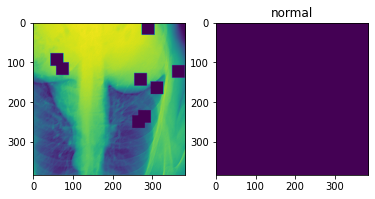

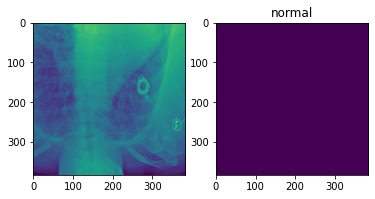

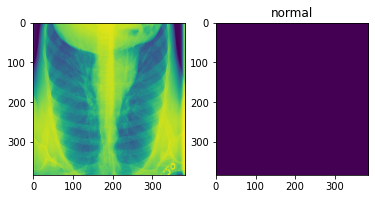

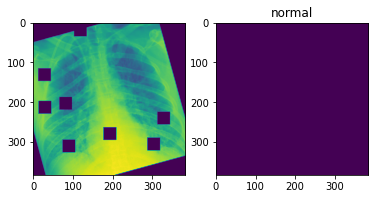

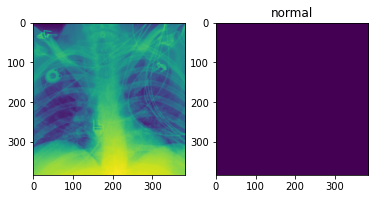

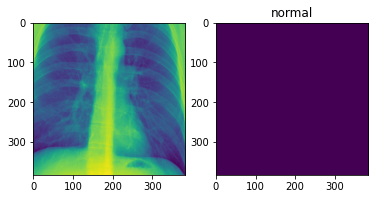

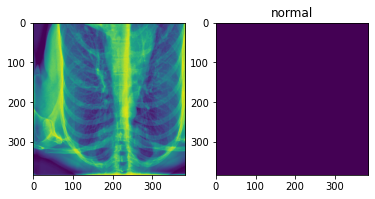

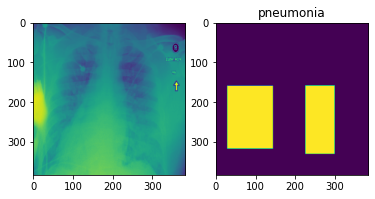

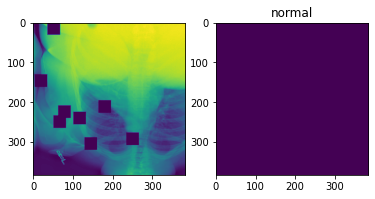

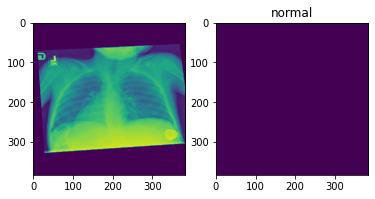

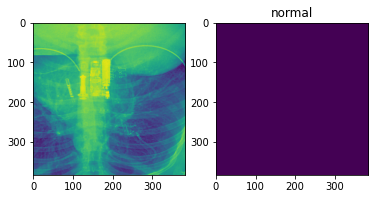

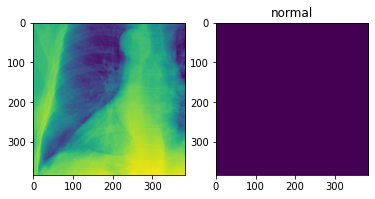

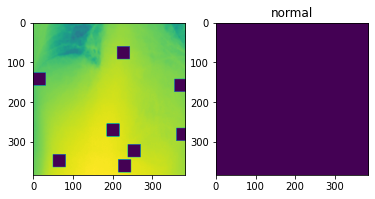

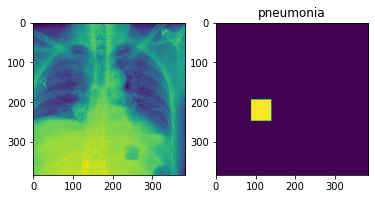

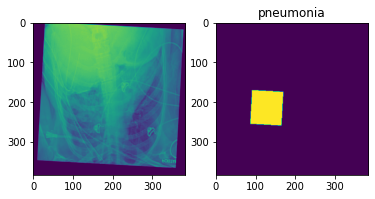

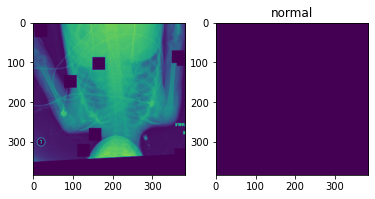

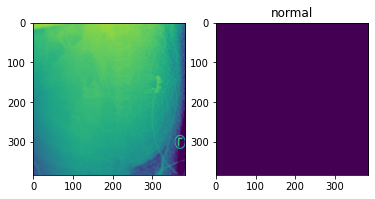

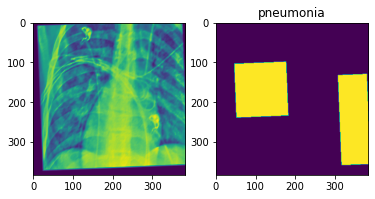

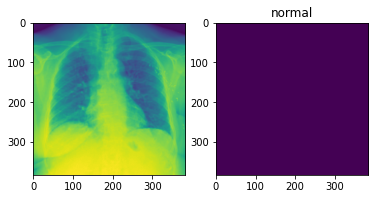

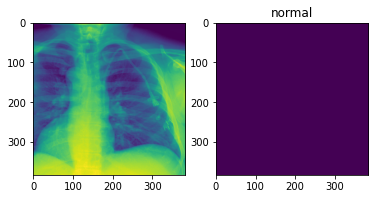

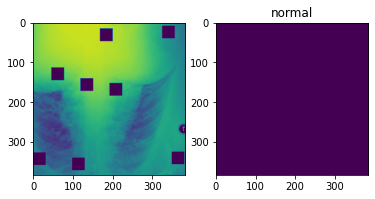

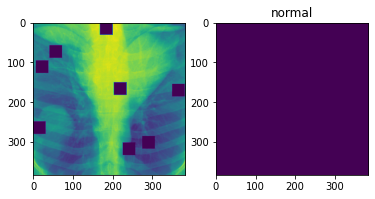

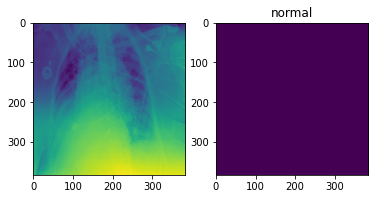

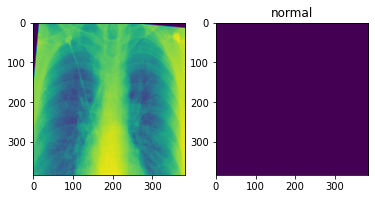

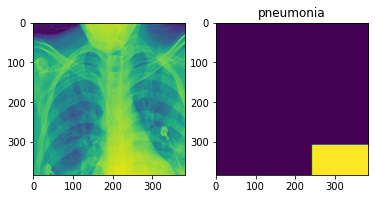

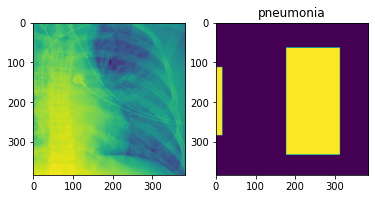

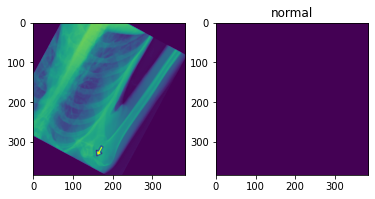

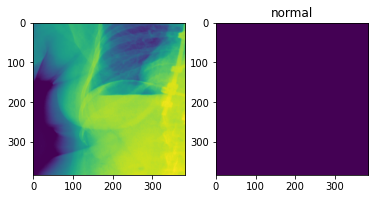

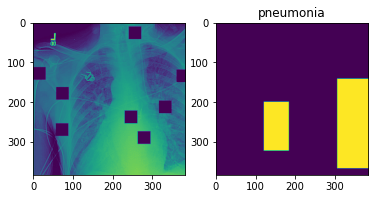

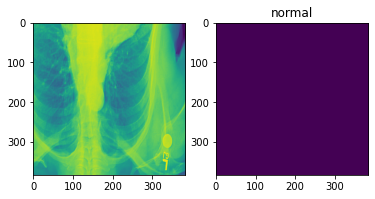

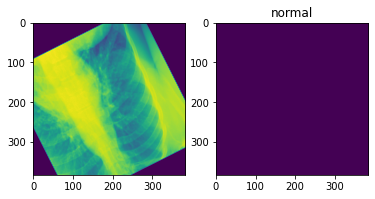

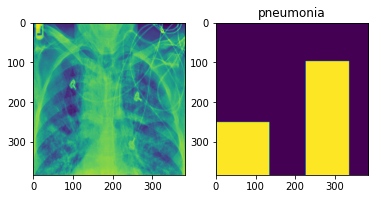

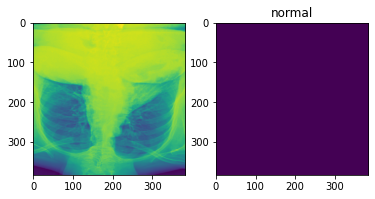

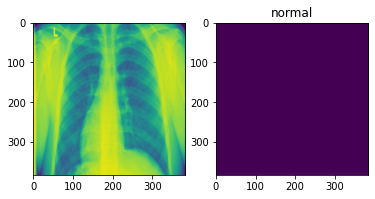

In [46]:
for i,m,l in zip(images,masks,labels):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(i[0])
    plt.subplot(1,2,2)
    plt.imshow(m[0])
    plt.title(rsnapneumonia_classes[np.where(l==1)[0][0]])

In [11]:
pretrained_path = 'chexpert_chest14_pretrain/{}_{}_pretrain_step1.pth'.format(cfg['encoder_name'], cfg['chest14_image_size'])
pretrained_num_classes = len(chest14_classes)

In [12]:
model = SiimCovidAuxModel(
        encoder_name=cfg['encoder_name'],
        encoder_weights=None,
        decoder=cfg['decoder'],
        classes=len(rsnapneumonia_classes),
        in_features=cfg['in_features'],
        decoder_channels=cfg['decoder_channels'],
        encoder_pretrained_path=pretrained_path,
        encoder_pretrained_num_classes=pretrained_num_classes,
        model_pretrained_path='rsnapneu_pretrain/timm-efficientnet-b3_384_deeplabv3plus_rsnapneu.pth', 
        model_pretrained_num_classes=2)

Load pretrain: rsnapneu_pretrain/timm-efficientnet-b3_384_deeplabv3plus_rsnapneu.pth


In [13]:
model.eval()

SiimCovidAuxModel(
  (encoder): EfficientNetEncoder(
    (conv_stem): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): Swish()
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
          (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): Swish()
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (act1): Swish()
            (conv_expand): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
          )
          (conv_pw): Conv2d(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act2): 

In [28]:
for batch in valid_loader:
    images,masks,labels = batch
    seg_mask, labels_pred=model(images)
    break

In [30]:
for o in [images,masks,labels,seg_mask, labels_pred]:
    print(type(o))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [31]:
images,masks,labels = map(lambda t: t.detach().cpu().numpy(), [images,masks,labels])

In [32]:
seg_mask, labels_pred = map(lambda t: t.detach().cpu().numpy(), [seg_mask, labels_pred])

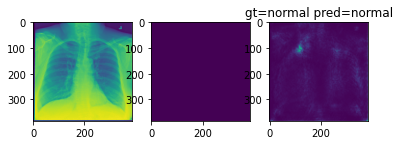

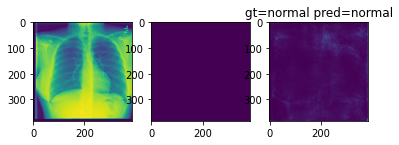

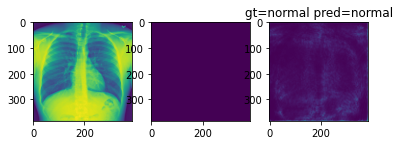

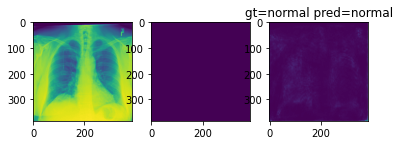

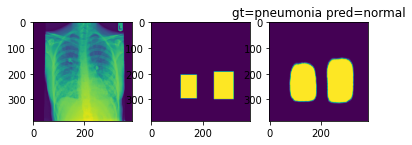

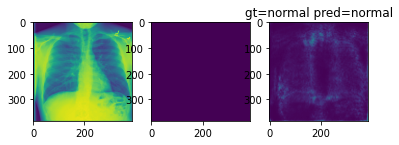

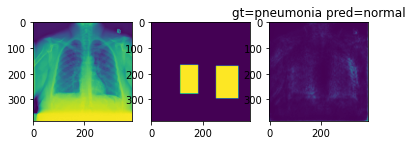

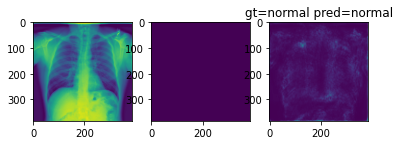

In [33]:

for i,m,l,s,l_pred in zip(images,masks,labels,seg_mask, labels_pred):

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(i[0])
    plt.subplot(1,3,2)
    plt.imshow(m[0])
    plt.subplot(1,3,3)
    plt.imshow(s[0])
    plt.title(f'gt={rsnapneumonia_classes[np.where(l==1)[0][0]]} pred={rsnapneumonia_classes[np.argmax(l_pred)]}')


# siim

In [4]:
from utils import seed_everything, refine_dataframe, get_study_map
from models import SiimCovidAuxModel
from dataset import SiimCovidAuxDataset, classes, rsnapneumonia_classes

In [6]:
import yaml

cfg='configs/eb3_384_deeplabv3plus.yaml'
with open(cfg,'rt') as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

In [7]:
fold=0
df = pd.read_csv('../../dataset/siim-covid19-detection/train_kfold.csv')


valid_df = df.loc[df['fold'] == fold]
valid_df = refine_dataframe(valid_df)

train_df = df.loc[df['fold'] != fold]
train_df = refine_dataframe(train_df)


train_dataset = SiimCovidAuxDataset(
    df=train_df,
    images_dir='../../dataset/siim-covid19-detection/images/train',
    image_size=cfg['aux_image_size'], mode='train')
valid_dataset = SiimCovidAuxDataset(
    df=valid_df,
    images_dir='../../dataset/siim-covid19-detection/images/train',
    image_size=cfg['aux_image_size'], mode='valid')

train_loader = DataLoader(train_dataset, batch_size=cfg['aux_batch_size'], sampler=RandomSampler(train_dataset),
                          num_workers=cfg['workers'], drop_last=True)
valid_loader = DataLoader(valid_dataset, batch_size=cfg['aux_batch_size'],
                          sampler=SequentialSampler(valid_dataset), num_workers=cfg['workers'], drop_last=False)


/home/sergey/anaconda3/envs/covid19/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:222: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/home/sergey/anaconda3/envs/covid19/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:165: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please use Emboss instead", FutureWarning)
/home/sergey/anaconda3/envs/covid19/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:645: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


In [8]:
model = SiimCovidAuxModel(
            encoder_name=cfg['encoder_name'],
            encoder_weights=None,
            decoder=cfg['decoder'],
            classes=len(classes),
            in_features=cfg['in_features'],
            decoder_channels=cfg['decoder_channels'],
            encoder_pretrained_path='checkpoints/timm-efficientnet-b3_384_deeplabv3plus_aux_fold0.pth',
            encoder_pretrained_num_classes=2,
            model_pretrained_path='rsnapneu_pretrain/{}_{}_{}_rsnapneu.pth'.format(cfg['encoder_name'],
                                                                                   cfg['aux_image_size'],
                                                                                   cfg['decoder']),
            model_pretrained_num_classes=len(rsnapneumonia_classes))

Load pretrain: rsnapneu_pretrain/timm-efficientnet-b3_384_deeplabv3plus_rsnapneu.pth


In [9]:
for batch in valid_loader:
    images,masks,labels,_ = batch
    seg_mask, labels_pred=model(images)
    break

In [10]:
images,masks,labels = map(lambda t: t.detach().cpu().numpy(), [images,masks,labels])
seg_mask, labels_pred = map(lambda t: t.detach().cpu().numpy(), [seg_mask, labels_pred])

/home/sergey/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


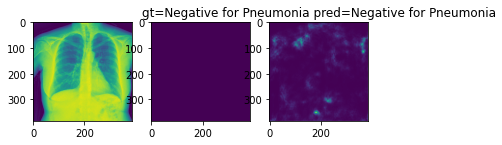

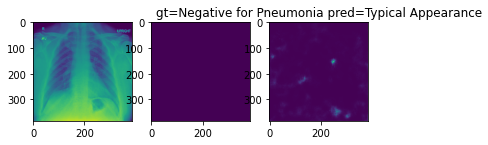

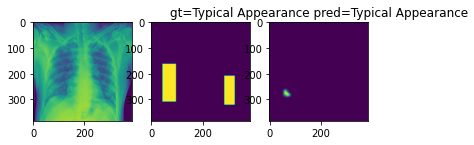

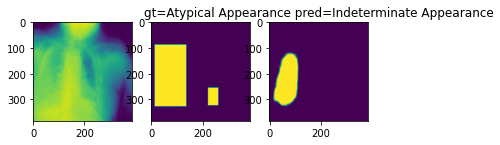

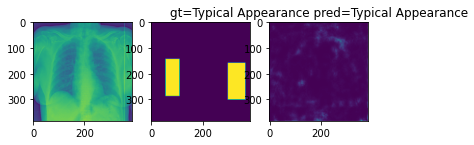

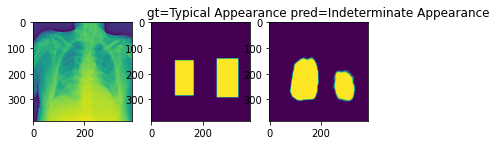

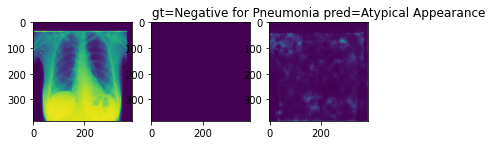

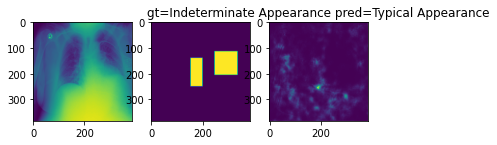

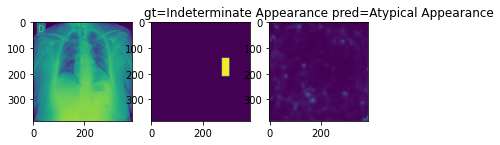

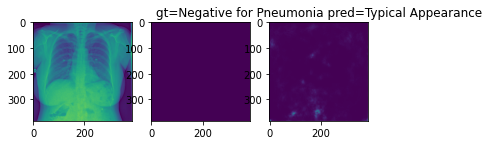

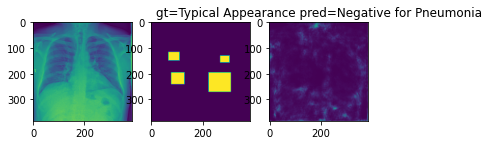

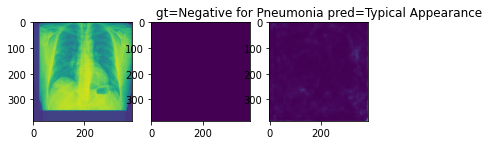

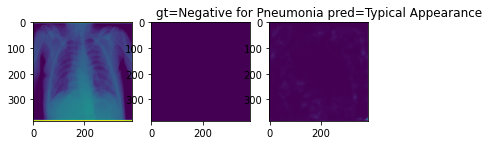

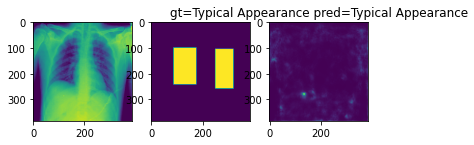

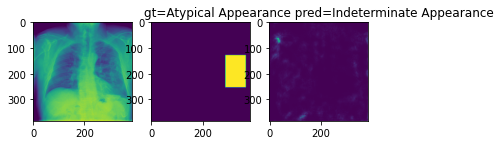

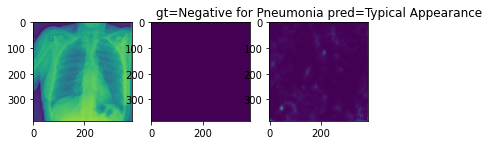

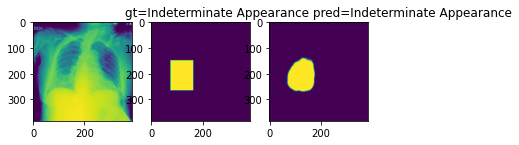

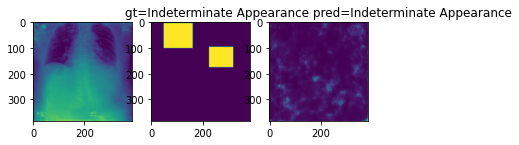

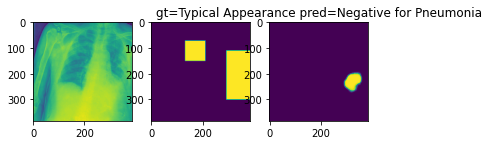

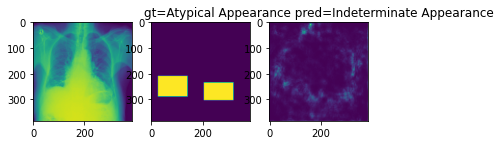

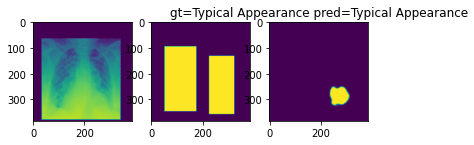

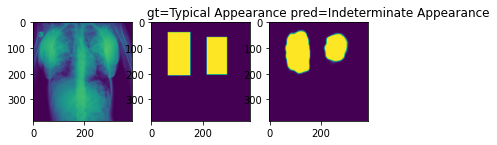

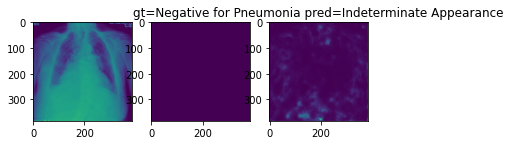

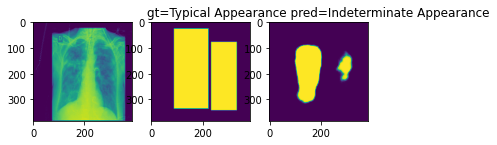

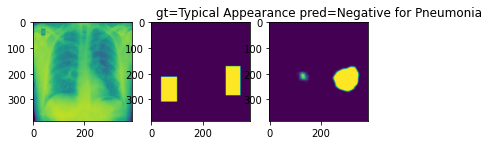

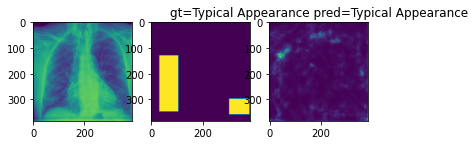

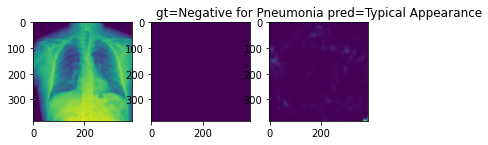

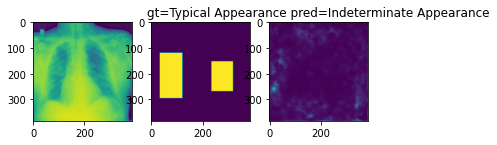

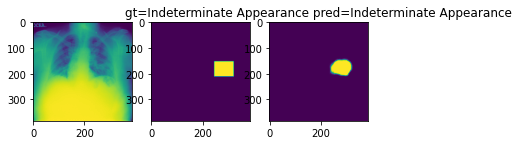

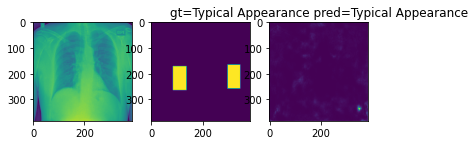

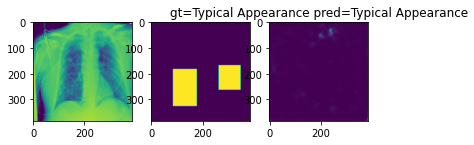

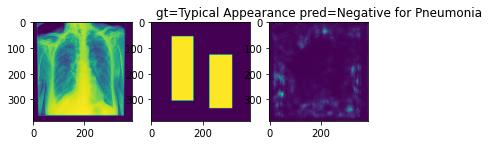

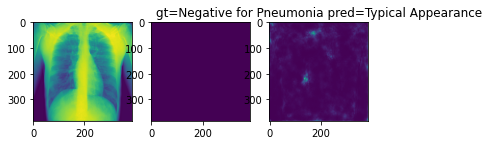

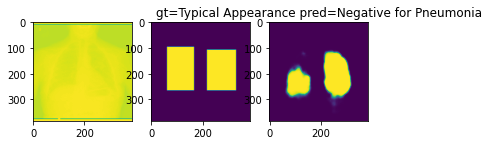

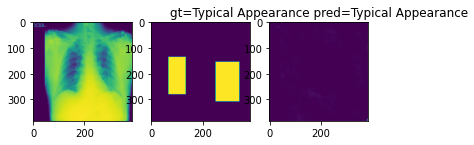

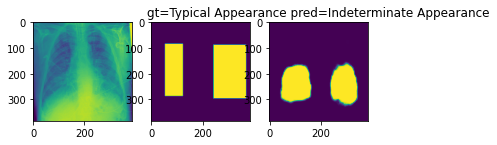

In [12]:

for i,m,l,s,l_pred in zip(images,masks,labels,seg_mask, labels_pred):

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(i[0])
    plt.subplot(1,3,2)
    plt.imshow(m[0])
    plt.subplot(1,3,3)
    plt.imshow(s[0])
    plt.title(f'gt={classes[np.where(l==1)[0][0]]} pred={classes[np.argmax(l_pred)]}')
